In [10]:
import pandas as pd

## 读取数据

In [11]:
essay_df = pd.read_csv("../data/detect-ai-generated-text-mix/train_essays.csv")
essay_df = essay_df[~essay_df["text"].isna()].copy()
essay_df = essay_df.reset_index(drop=True)
essay_df.head()


,id,prompt_id,text,generated
0,e_uzd3mt3h,0,Disgusting pollution in the air? Smog covering...,1
1,e_66i856pn,0,A car is considered by many a nessecity for ev...,0
2,e_mtj3jbhc,0,There are many diffrent types of cars that are...,1
3,e_q0u23al1,0,"Highways, roads, streets they are everywhere. ...",1
4,e_6ua19i7b,0,"In German suburb, Life Goes On Without Cars , ...",0


In [12]:
prompt_ids = essay_df["prompt_id"].unique().tolist()
gdf = essay_df.groupby("prompt_id")["id"].apply(list).reset_index()
prompt2ids = dict(zip(gdf["prompt_id"], gdf["id"]))

print(f"no. of essay: {essay_df.shape[0]}")
print(f"Prompts: {prompt_ids}")


no. of essay: 83182
Prompts: [0, 1, 2, 3, 4, 5, 6]


## 文章字数分布

In [13]:
num_words_list = essay_df["text"].apply(lambda x: len(str(x).split(" ")))
bin_size = 200
max_length = num_words_list.max()
bins = list(range(0, 1001, bin_size)) + [float("inf")]
length_range = pd.cut(num_words_list, bins=bins)
length_range_distribution = length_range.value_counts().sort_index()

length_range_distribution


text
(0.0, 200.0]       11930
(200.0, 400.0]     41950
(400.0, 600.0]     21875
(600.0, 800.0]      6106
(800.0, 1000.0]     1026
(1000.0, inf]        295
Name: count, dtype: int64

d:\Users\alexa\anaconda3\envs\dl\lib\site-packages\matplotlib\axes\_axes.py:6895: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


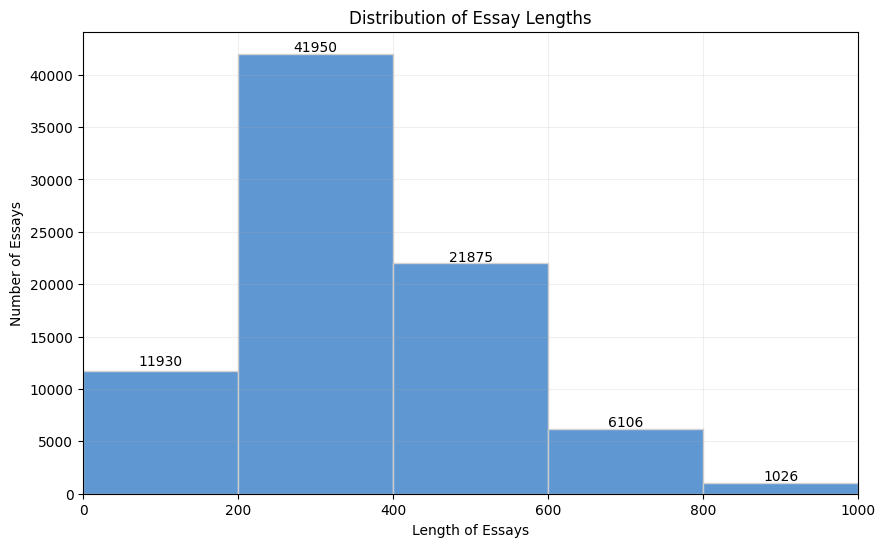

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(num_words_list, bins=bins, edgecolor="lightgray", color="#5F97D2")
plt.title("Distribution of Essay Lengths")
plt.xlabel("Length of Essays")
plt.ylabel("Number of Essays")
plt.xlim(0, 1000)
for i in range(len(length_range_distribution) - 1):
    plt.text(
        bins[i] + bin_size / 2,
        length_range_distribution.iloc[i],
        str(length_range_distribution.iloc[i]),
        ha="center",
        va="bottom",
    )
plt.grid(True, alpha=0.2)
plt.show()


## 生成分布

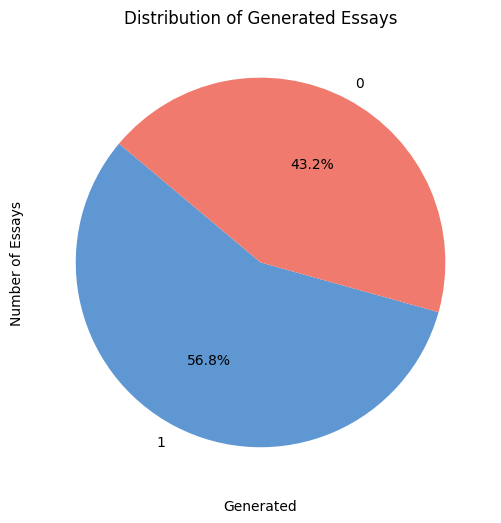

no. of essay written by human: 35956
no. of essay written by ai   : 47226


In [15]:
generated_count = essay_df["generated"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    generated_count,
    labels=generated_count.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#5F97D2", "#EF7A6D"],
)
plt.title("Distribution of Generated Essays")
plt.xlabel("Generated")
plt.ylabel("Number of Essays")
plt.show()

print(f"no. of essay written by human: {generated_count[0]}")
print(f"no. of essay written by ai   : {generated_count[1]}")
